In [246]:
from PIL import Image, ImageEnhance, ExifTags
from PIL.ExifTags import TAGS

import numpy as np
import matplotlib.pyplot as plt

import re
import os
from os import walk
import math

In [247]:
wd = os.getcwd()

In [248]:
fnames = []
images = []

for (dirpath, dirnames, filenames) in walk(wd):  
    fnames.append(dirnames)
    fnames.append(filenames)

for file in fnames[-1]:
    images.append(Image.open(fnames[0][-1] + "/" + file))
    
"""
img = Image.open("images/G2DSC_0432.jpg")
img1 = Image.open("images/GDSC_0839.jpg")
img2 = Image.open("images/DSC_0793_edited.jpg")
imgbw = Image.open("images/DSC_0659.jpg")
imgblack = Image.open("images/DSC_0016.jpg")
imgwhite = Image.open("images/DSC_0017.jpg")
imgmix = Image.open("images/DSC_0018.jpg")
"""

'\nimg = Image.open("images/G2DSC_0432.jpg")\nimg1 = Image.open("images/GDSC_0839.jpg")\nimg2 = Image.open("images/DSC_0793_edited.jpg")\nimgbw = Image.open("images/DSC_0659.jpg")\nimgblack = Image.open("images/DSC_0016.jpg")\nimgwhite = Image.open("images/DSC_0017.jpg")\nimgmix = Image.open("images/DSC_0018.jpg")\n'

In [25]:
def getexifdata(inputimage):
    
    exifdata = inputimage._getexif()

    wantedtags = ["ISOSpeedRatings", "FocalLength", "MaxApertureValue", 
                  "ExposureTime", "FNumber", "WhiteBalance", "MeteringMode", 
                  "LightSource", "Contrast", "Saturation", "Sharpness"]
    
    fdata = {}

    for tagid, data in exifdata.items():
        name = TAGS.get(tagid, tagid)
        
        #print(name, tagid)

        if name in wantedtags:
            fdata[name] = data

    return fdata

In [26]:
outdata = []

for img in images:
    outdata.append(getexifdata(img))

In [11]:
#0 metering, 5pm
outdata[0]

{'MaxApertureValue': (30, 10),
 'MeteringMode': 5,
 'LightSource': 14,
 'FocalLength': (400, 10),
 'ExposureTime': (10, 16),
 'FNumber': (28, 10),
 'ISOSpeedRatings': 100,
 'WhiteBalance': 1,
 'Contrast': 0,
 'Saturation': 0,
 'Sharpness': 1}

In [12]:
# iso 200 400 800
outdata[1:4]

[{'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 30),
  'FNumber': (45, 10),
  'ISOSpeedRatings': 200,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1},
 {'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 30),
  'FNumber': (45, 10),
  'ISOSpeedRatings': 400,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1},
 {'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 30),
  'FNumber': (45, 10),
  'ISOSpeedRatings': 800,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1}]

In [13]:
# shutter
outdata[4:]

[{'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 30),
  'FNumber': (28, 10),
  'ISOSpeedRatings': 100,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1},
 {'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 25),
  'FNumber': (28, 10),
  'ISOSpeedRatings': 100,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1},
 {'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 20),
  'FNumber': (28, 10),
  'ISOSpeedRatings': 100,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,
  'Sharpness': 1},
 {'MaxApertureValue': (30, 10),
  'MeteringMode': 5,
  'LightSource': 14,
  'FocalLength': (400, 10),
  'ExposureTime': (10, 16),
  'FNumber': (28, 10),
  'ISOSpeedRatings': 100,
  'WhiteBalance': 1,
  'Contrast': 0,
  'Saturation': 0,

In [15]:
iso1 = np.asarray(images[1])
iso2 = np.asarray(images[2])
iso3 = np.asarray(images[3])

In [17]:
def pmeans(array, averages):
     for x in array[0]:
         averages.append(x.mean())

In [19]:
avgiso1 = []
avgiso2 = []
avgiso3 = []

pmeans(iso1, avgiso1)
pmeans(iso2, avgiso2)
pmeans(iso3, avgiso3)

3


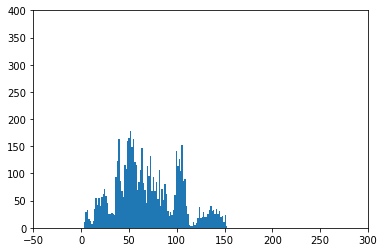

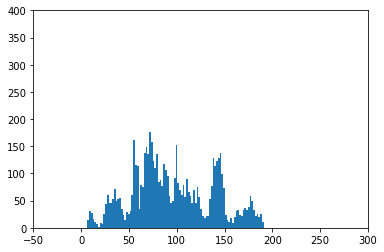

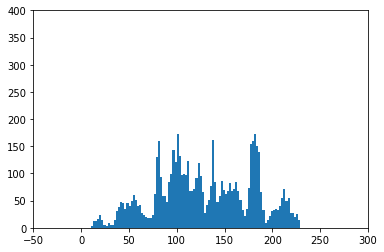

In [237]:
def hist(averages):
    
    if isinstance(averages[0], list):
        loop = len(averages)
    else:
        loop = 1
        averages = [averages]
        
    print(loop)
        
    for x in range(loop):
        
        yax = [0, 400]
        xax = [-50,300]

        plt.hist(averages[x], bins = 100)
        avgplot = plt.gca()
        avgplot.set_ylim(yax)
        avgplot.set_xlim(xax)
        plt.show()

hist([avgiso1, avgiso2, avgiso3])
    
# yax = [0, 400]
# xax = [-50,300]

# plt.hist(sorted(avgiso1), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgiso2), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgiso3), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

In [28]:
lightall = np.asarray(images[8])
lightmain = np.asarray(images[9])
lightnone = np.asarray(images[10])
lightside = np.asarray(images[11])

In [187]:
avglighta = []
avglightm = []
avglightn = []
avglights = []

pmeans(lightall, avglighta)
pmeans(lightmain, avglightm)
pmeans(lightnone, avglightn)
pmeans(lightside, avglights)

# avglightn = [x * 10 + 60 for x in avglightn]
# avglights = [x * 2.7 for x in avglights]


print(float(sum(avglighta)) / float(len(avglighta)))
print(float(sum(avglights)) / float(len(avglights)))

print((float(sum(avglighta)) / float(len(avglighta))) / (float(sum(avglights)) / float(len(avglights))))


200.77733333333003
74.43555555555437
2.6973310245999507


4


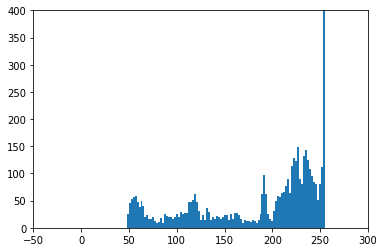

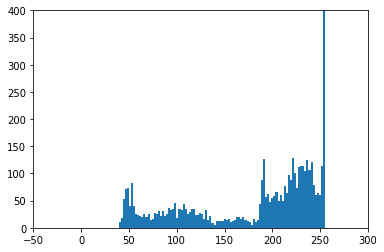

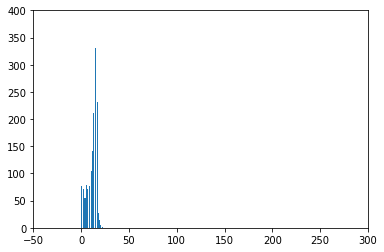

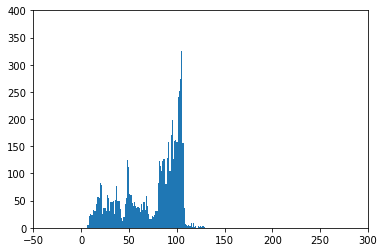

In [188]:
hist([avglighta, avglightm, avglightn, avglights])


# yax = [0, 400]
# xax = [-50,300]

# plt.hist(sorted(avglighta), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglightm), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglightn), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avglights), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

In [212]:
pixels = []

def adjust(pixel, nums, scale):
    nums.sort()
    
    pixels.append(pixel)
    if nums[1] > pixel > nums[0]:
        return pixel * scale
    return pixel

In [228]:
def editimage(image_in, scale, nums=[-1,257], show=True):
    
    assert isinstance(show, bool)
    
    out = image_in.point(lambda i: adjust(i, nums, scale))
    
    if show:
        out.show()
    else:
        return out

# out = images[1].point(lambda i: adjust(i))

# #display image
# out.show()

In [219]:
editimage(images[1], 1.7, [30, 45])


In [220]:
editimage(images[1], 1)

In [105]:
# source = images[11].split()

# R, G, B = 0, 1, 2

# # select regions where red is less than 100
# mask = source[R].point(lambda i: i < 100 and 255)

# # process the green band
# out = source[G].point(lambda i: i * 0.7)

# # paste the processed band back, but only where red was < 100
# source[G].paste(out, None, mask)

# # build a new multiband image
# im = Image.merge(images[11].mode, source)

# im.show()

In [ ]:
# check for average of maxes and mins to deterine if photo is over or under exposed
# maybe just edit first photo and use histogram to adjust all sequential photos
# 

In [189]:
def std(array):
    arrlen = len(array)
    arrsum = sum(array)
    
    arrmean = float(arrsum) / float(arrlen)
    
    arrdev = [(x - arrmean)**2 for x in array]
    
    arrstd = float(sum(arrdev)) / float(len(arrdev))
    
    return arrstd

In [190]:
print(std(avglighta))
print(std(avglightm))
print(std(avglightn))
print(std(avglights))

4094.5877158518533
4588.822976639017
29.67258211111094
885.1354395061694


1.3466922614280261
0.9999999999999842
[47.583126570456926, 55.21438271854907, 61.05004918473719, 67.33461307140131, 70.02799759425736]
1


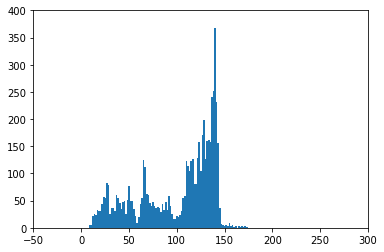

In [245]:
stdratio = std(avg0) / std(avglights)

scaler = stdratio**0.5
print(scaler)

avglightscaled = [x * scaler for x in avglights]

print(std(avg0) / std(avglightscaled))

print(avglightscaled[0:5])

hist(avglightscaled)

editimage(images[11], scaler)

In [249]:
print(len(images))

17


In [251]:
sunset1 = np.asarray(images[13])
sunsetp1 = np.asarray(images[14])
sunset2 = np.asarray(images[15])
sunsetp2 = np.asarray(images[16])

In [260]:
sunavg1 = []
sunavgp1 = []
sunavg2 = []
sunavgp2 = []

pmeans(sunset1, sunavg1)
pmeans(sunsetp1, sunavgp1)
pmeans(sunset2, sunavg2)
pmeans(sunsetp2, sunavgp2)

1


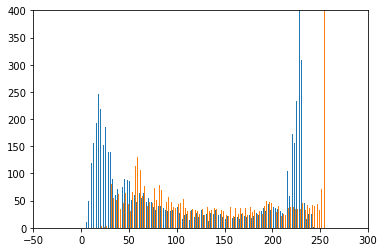

In [275]:
# hist([sunavg1, sunavg2, sunavgp1, sunavgp2])

hist([[sunavg2, sunavgp2]])

7509.333988268444
6735.190521926078
1.0559072398386946
1.0000000000000093
[266.08862443935107, 265.0327171995123, 264.6807481195661, 266.08862443935107, 266.4405935192973]
1


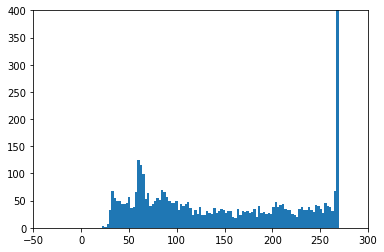

In [267]:
print(std(sunavg2))
print(std(sunavgp2))

stdratio = std(sunavg2) / std(sunavgp2)

scaler = stdratio**0.5
print(scaler)

avglightscaled = [x * scaler for x in sunavgp2]

print(std(sunavg2) / std(avglightscaled))

print(avglightscaled[0:5])

hist(avglightscaled)

editimage(images[16], scaler)

In [ ]:
# #Notes

# std dev is not enough, need more variables in alg

# ideas:
#     mean
#     mode
#     median
#     x min and max
#     y min and max
#     local/smaller population size analysis
#     log?
#     IQR?
#     somethign to do with violin plot?

In [162]:
exp0 = np.asarray(images[0])
exp1 = np.asarray(images[1])

In [171]:
avg0 = []
pmeans(exp0, avg0)

avg01= []
pmeans(exp1, avg01)

avg01 = [x * 1.6 for x in avg01]

2


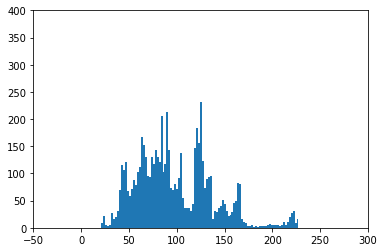

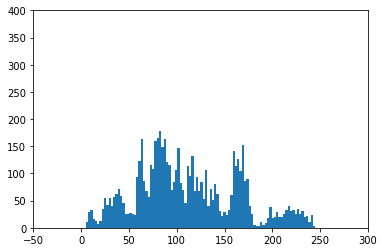

In [191]:
hist([avg0, avg01])

In [4]:

# imarr = np.asarray(img)
# imarr1 = np.asarray(img1)
# imarr2 = np.asarray(img2)
# imarrbw = np.asarray(imgbw)
# imarrblack = np.asarray(imgblack)
# imarrwhite = np.asarray(imgwhite)
# imarrmix = np.asarray(imgmix)

In [5]:
# imarr.shape

(4000, 6000, 3)

In [6]:
# imarr[3999,3999]

array([45, 22, 16], dtype=uint8)

In [7]:
# avg = []
# avg1 = []
# avg2 = []
# avgbw = []
# avgbl = []
# avgwh = []
# avgmx = []

In [8]:
# def pmeans(array, averages):
#     for x in array[0]:
#         averages.append(x.mean())

# pmeans(imarr, avg)
# pmeans(imarr1, avg1)
# pmeans(imarr2, avg2)
# pmeans(imarrbw, avgbw)
# pmeans(imarrblack, avgbl)
# pmeans(imarrwhite, avgwh)
# pmeans(imarrmix, avgmx)

In [9]:
# avgwh[1000]

255.0

In [10]:
# for x in avg:
#     if x == None:
#         print("t")

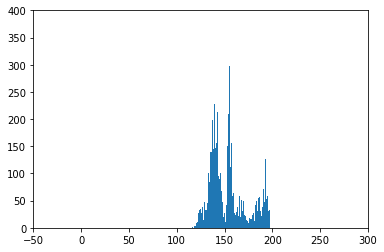

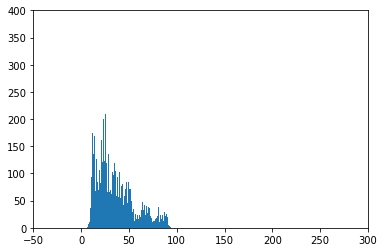

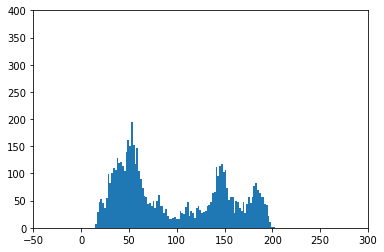

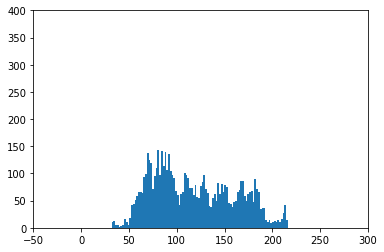

In [11]:
# #print(sorted(avg)[1:100])

# yax = [0, 400]
# xax = [-50,300]

# plt.hist(sorted(avg), bins = 100)
# avgplot = plt.gca()
# avgplot.set_ylim(yax)
# avgplot.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avg1), bins = 100)
# avgplot1 = plt.gca()
# avgplot1.set_ylim(yax)
# avgplot1.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avg2), bins = 100)
# avgplot2 = plt.gca()
# avgplot2.set_ylim(yax)
# avgplot2.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgbw), bins = 100)
# avgplotbw = plt.gca()
# avgplotbw.set_ylim(yax)
# avgplotbw.set_xlim(xax)
# plt.show()

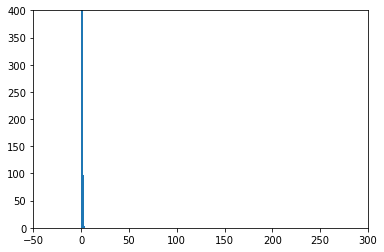

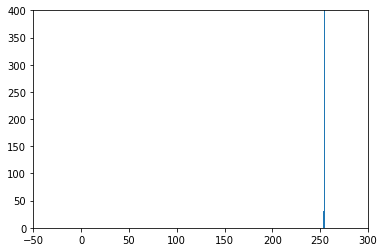

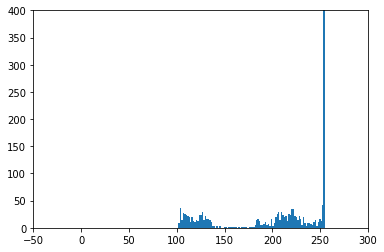

In [12]:
# plt.hist(sorted(avgbl), bins = 5)
# avgplotbl = plt.gca()
# avgplotbl.set_ylim(yax)
# avgplotbl.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgwh), bins = 5)
# avgplotwh = plt.gca()
# avgplotwh.set_ylim(yax)
# avgplotwh.set_xlim(xax)
# plt.show()

# plt.hist(sorted(avgmx), bins = 100)
# avgplotmx = plt.gca()
# avgplotmx.set_ylim(yax)
# avgplotmx.set_xlim(xax)
# plt.show()

In [12]:
# im = Image.fromarray(imarr)

In [13]:
# a = np.array([1,2,3])

In [14]:
# type(a)

numpy.ndarray

In [23]:
# out = img.point(lambda i: i**1.3)


# #display image
# out.show()

In [61]:
# outdata = getexifdata(img)
# outdata1 = getexifdata(img1)
# outdata2 = getexifdata(img2)

In [62]:
# print(outdata)
# print(outdata1)
# print(outdata2)

{'MaxApertureValue': (38, 10), 'MeteringMode': 5, 'LightSource': 10, 'FocalLength': (220, 10), 'ExposureTime': (10, 80), 'FNumber': (220, 10), 'ISOSpeedRatings': 100, 'WhiteBalance': 1, 'Contrast': 0, 'Saturation': 0, 'Sharpness': 0}
{'MaxApertureValue': (50, 10), 'MeteringMode': 5, 'LightSource': 0, 'FocalLength': (520, 10), 'ExposureTime': (10, 600), 'FNumber': (110, 10), 'ISOSpeedRatings': 100, 'WhiteBalance': 0, 'Contrast': 0, 'Saturation': 0, 'Sharpness': 0}
{'MaxApertureValue': (50, 10), 'MeteringMode': 5, 'LightSource': 0, 'FocalLength': (520, 10), 'WhiteBalance': 0, 'Contrast': 0, 'Sharpness': 0, 'ExposureTime': (1, 100), 'FNumber': (56, 10), 'ISOSpeedRatings': 100, 'Saturation': 0}
